In [ ]:
! pip install fastai


In [ ]:
import fastai
from fastai import *
from fastai.text import *
from fastai.data.core import L
fastai.__version__

'2.7.14'

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook


# Data

In [ ]:
train_df = pd.read_csv('/content/train_data.txt',  sep=':::', header=None,
                       names=('name', 'genre', 'text'), index_col=0)

<ipython-input-4-f59030fede8f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df = pd.read_csv('/content/train_data.txt',  sep=':::', header=None,


In [ ]:
train_df.head()

name       genre  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  
1                                                        Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.  
2                                                                                                                                                                                                                                                                                                                                                                                                                                  A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.  
3   As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After the films, they release the emotion of the fantasies in the most erotic and uncommon ways. One slips off to the curator's office for a little "acquisition. " Another finds the anthropologist to see what bones can be identified. Even the head teacher isn't immune. Soon the tour is over, but as the b...  
4   To help their unemployed father make ends meet, Edith and her twin sister Grace work as seamstresses . An invalid, Grace falls prey to the temptations of Chinatown opium and becomes an addict, a condition worsened by a misguided physician who prescribes morphine to ease her pain. When their father strikes oil, the family enjoys a new prosperity and the sisters meet the eligible Jack Herron, a fellow oil prospector. To Grace's shock, Jack falls in love with Edith and in her jealousy, Grace tells Jack that Edith, not she, has a drug problem. Hinting that her sister will soon need more morph...  
5   The film's title refers not only to the un-recovered bodies at ground zero, but also to the state of the nation at large. Set in the hallucinatory period of time between September 11 and Halloween of 2001, The Unrecovered examines the effect of terror on the average mind, the way a state of heightened anxiety and/or alertness can cause the average person to make the sort of imaginative connections that are normally made only by artists and conspiracy theorists-both of whom figure prominently in this film. The Unrecovered explores the way in which irony, empathy, and paranoia relate to one...

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6311 entries, 1 to 6311
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6311 non-null   object
 1   genre   6311 non-null   object
 2   text    6311 non-null   object
dtypes: object(3)
memory usage: 197.2+ KB


In [ ]:
train_df.genre.value_counts()

genre
 drama           1557
 documentary     1530
 comedy           869
 short            587
 horror           248
 thriller         227
 action           149
 western          125
 reality-tv       105
 family            88
 adventure         87
 sci-fi            82
 music             77
 adult             77
 romance           63
 animation         57
 sport             52
 crime             51
 talk-show         44
 fantasy           40
 mystery           40
 biography         38
 musical           33
 history           27
 game-show         26
 news              18
 war               14
Name: count, dtype: int64

In [ ]:
test_df = pd.read_csv('/content/test_data.txt',  sep=':::', header=None,
                      names=('name', 'text'), index_col=0)
test_df.head()

<ipython-input-8-0d5d7c2362d5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df = pd.read_csv('/content/test_data.txt',  sep=':::', header=None,


name  \
1          Edgar's Lunch (1998)    
2      La guerra de papá (1977)    
3   Off the Beaten Track (2010)    
4        Meu Amigo Hindu (2015)    
5             Er nu zhai (1955)    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  
1                                                                                            L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.  
2   Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of "prince" of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the resulting anger of his mother, the nanny and the old housemaid. The rest of the family members are two much older brothers, his resigned mother and a retrograde father of authoritarian ideas. But many years have passed, and the civ...  
3            One year in the life of Albin and his family of shepherds in the North of Transylvania. In direct cinema style, this documentary follows their day to day routines, and their struggle to adapt to a new world where traditions are gradually replaced by modern values. Since joining the EU, Romania has been facing, like several other Eastern European countries, the pressure of modern values, introducing in farmer's lives the cruel notion of competition, the temptation of migrating to the higher salaries abroad, and the marginalization of locally produced food against industrial products.  
4   His father has died, he hasn't spoken with his brother for about 10 years and has a serious cancer. Diego is a talented film director with difficulty to deal with his sickness, which is making him lose his friends and family. His best friend and doctor Ricardo gives him the news that he needs a bone marrow transplantation, otherwise he'll die. He gets married to a beautiful woman, Livia, just before going to Seattle to get treatment. There, he undergoes numerous medical procedures. During treatment, he meets an Hindu boy, with whom he plays and whom he tells amazing stories. Odds are agai...  
5   Before he was known internationally as a martial arts superstar, Bruce Lee had appeared in a handful of Hong Kong films as a child star in the 1940s/50s. One of these early films was The More the Merrier (1955), a.k.a. We Owe it to Our Children from the Union Film Enterprise, a family melodrama written and directed by renowned filmmaker Chin Chien (My Intimate Partners). Featuring the 14-year-old Bruce Lee and future Cantonese Opera star Yuen Siu Fai, the B&W film revolves around accountant Ming (played by Cheung Wood Yau) and his wife (Tsi Lo Lin) who suffers a miscarriage in an car acci...

# Preprocessing

### Lower

In [ ]:
train_df['text'] = train_df['text'].str.lower()
test_df['text'] = test_df['text'].str.lower()

### train_test_split

In [ ]:
# split data into training and validation set
df_trn, df_val = train_test_split(train_df[['genre','text']], stratify = train_df['genre'],
                                  test_size = 0.05, random_state = 42)
df_trn.shape, df_val.shape

((5995, 2), (316, 2))

In [ ]:
df_trn.head()

genre  \
2013   documentary    
4129        comedy    
2530        comedy    
3368   documentary    
1023        comedy    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         text  
2013                                                                                             suge knight is fighting for his life. he has been charged with murder and attempted murder. this film will put his current legal trouble all in perspective. it all began on september 7, 1996 - the night he was riding in the car with tupac shakur when shots rang out. he was targeted along with tupac for murder that night and they have been after him ever since. if they can't kill him they want to banish him to the nethermost parts of the american prison system where they can silence him once and for all.  
4129                                                                                                                                                                                 a well respected producer who hasn't had a hit film in 20 years thinks he has struck a cinematic goldmine when he decides to back a new director who is the current "buzz-worthy" filmmaker on the festival circuit. he decides to have a small private screening in his home screening room with some industry professionals, but when the night does not go as planned, he is left wondering if he will have a career left to salvage.  
2530   meet patrick. patrick is a down-to-earth catholic guy who just graduated from community college. he's ready to move out from his parents' house for the first time and to take the world of adulthood by storm. in short order he lands a great job, finds a roommate in the big city, and meets numerous date able girls like clockwork. things are going great for patrick-or so it seems. as it turns out, the new job comes with a sex-crazed cougar co-worker on the prowl. the girls in the dating pool each have their own baggage. and the roommate, elijah, is a bible-thumping holier-than-thou neurotic ...  
3368   common drugs from previous generations like lsd, mushrooms, cocaine and opiates are still popular, but they've been joined by the likes of mdma and ecstasy, amphetamines, ketamine, and a massive array of others. according to the european monitoring centre for drugs and drug addiction, 243 new drugs have been reported since 2009. unfortunately, many festival-goers and other young people alike seem to be oblivious to the invasion of dangerous new drugs, and the ready availability of substance test kits and educational resources from various harm reduction organizations. the film crew docume...  
1023                                                                                     aidan park is comic and stand up comedian in los angeles. but unfortunately no one cares. because he is not famous. after realizing that you are nothing in hollywood without name recognition and fame, aidan park will pull out all stops to make sure he claws and scratches his way out from the f-list up to at least a level of a d-! from spinning signs on the street, begging like a homeless man, taking part in baby fetish wrestling (?!) and other acts of desperation, aidan is determined to take hollywood by storm.

# Encoder

In [ ]:
from fastai.text.all import *
import torch

data_lm = TextDataLoaders.from_df(df_trn, text_col='text', is_lm=True)

# Save DataLoaders
torch.save(data_lm, 'tmp_lm.pkl')

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [ ]:
learn.lr_find()
learn.recorder.plot_lr_find()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3,)
learn.freeze()

In [ ]:
learn.save_encoder('ft_enc')

# Text Classification

In [ ]:
# Classifier model data
data_clas = TextDataLoaders.from_df(df_trn, text_col='text', label_col='genre', valid_pct=0.2, bs=32)
import torch
torch.save(data_clas, 'tmp_DB.pkl')

In [ ]:
data_clas

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

### step-1

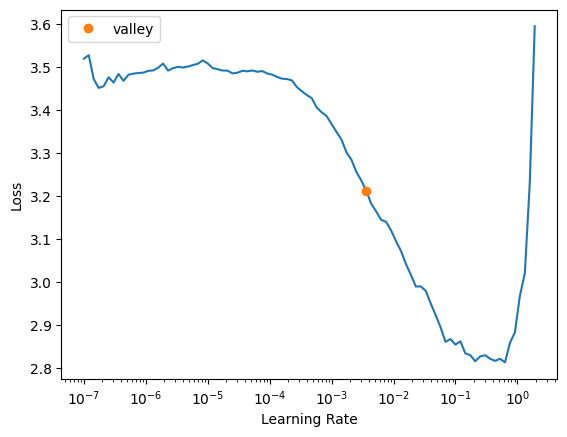

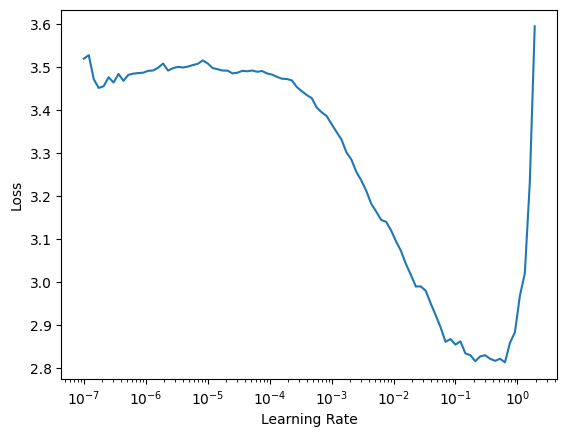

In [ ]:
learn.lr_find()
learn.recorder.plot_lr_find()

In [ ]:
learn.fit_one_cycle(5, 1e-2)
learn.save('step-1')

Path('models/step-1.pth')

### step-2

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(5e-3/2., 1e-3))
learn.freeze()
learn.save('step-2')

Path('models/step-2.pth')

### step-3

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-3/5, 1e-4))
learn.freeze()
learn.save('step-3')

Path('models/step-3.pth')

In [ ]:
learn.export()

# Predict & Submission

In [ ]:
%%time
predict = []
predict_proba = []
for text in tqdm_notebook(test_df.text):
    predicts = learn.predict(text)
    predict.append(int(predicts[1]))
    predict_proba.append(np.array(predicts[2]))


<timed exec>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/6531 [00:00<?, ?it/s]

CPU times: user 5h 49min 38s, sys: 1min 46s, total: 5h 51min 25s
Wall time: 8min 9s


In [ ]:
predict_proba = pd.DataFrame(predict_proba)
classes = data_clas.vocab[1]
predict_proba.columns = classes
predict_proba.to_csv('predict_proba.csv', index=False)
predict_proba.head()

action     adult    adventure    animation    biography    comedy   \
0  0.005104  0.006558     0.002217     0.000356     0.000366  0.030863   
1  0.004621  0.000045     0.003836     0.000497     0.001201  0.069293   
2  0.000063  0.000007     0.000165     0.000138     0.001228  0.003190   
3  0.002833  0.000751     0.001918     0.001005     0.004076  0.152910   
4  0.025208  0.000215     0.001292     0.000592     0.014251  0.052736   

     crime    documentary     drama    family   ...     news    reality-tv   \
0  0.013644       0.001151  0.220790  0.000777  ...  0.000060      0.000111   
1  0.000648       0.172901  0.729200  0.000719  ...  0.000026      0.000466   
2  0.000028       0.955146  0.019760  0.000262  ...  0.000046      0.000267   
3  0.001016       0.050343  0.649259  0.005811  ...  0.000119      0.001234   
4  0.011418       0.119299  0.707678  0.001745  ...  0.000358      0.000510   

    romance    sci-fi     short     sport    talk-show    thriller       war   \
0   0.006113  0.000936  0.049946  0.000180     0.000156    0.581336  0.000194   
1   0.000142  0.000195  0.009364  0.000160     0.000022    0.001935  0.000354   
2   0.000026  0.000037  0.016912  0.000316     0.000160    0.000045  0.000085   
3   0.008353  0.002677  0.096267  0.000269     0.000719    0.008186  0.000190   
4   0.002940  0.000598  0.005870  0.000514     0.000367    0.023047  0.000557   

    western   
0   0.000362  
1   0.000419  
2   0.000113  
3   0.000215  
4   0.001044  

[5 rows x 27 columns]

In [ ]:
genre_sub=[]
for i in predict:
    genre_sub.append(data_clas.vocab[1][i].replace(' ', ''))

submission = pd.DataFrame({'id':range(1, len(predict)+1), 'genre':genre_sub}, columns=['id', 'genre'])
submission.to_csv('submission.csv', index=False)
submission.head()


id        genre
0   1     thriller
1   2        drama
2   3  documentary
3   4        drama
4   5        drama